# Loan API Endpoint

In [2]:
import requests as r
from bs4 import BeautifulSoup as bs
import json
from pprint import pp
import pandas as pd

url = "https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json"
response = r.get(url)
#soup = bs(page.content)
pp(response)

<Response [200]>


In [3]:
data = response.json()
pp(data)


[{'Application_ID': 'LP001002',
  'Gender': 'Male',
  'Married': 'No',
  'Dependents': '0',
  'Education': 'Graduate',
  'Self_Employed': 'No',
  'Credit_History': 1,
  'Property_Area': 'Urban',
  'Income': 'medium',
  'Application_Status': 'Y'},
 {'Application_ID': 'LP001003',
  'Gender': 'Male',
  'Married': 'Yes',
  'Dependents': '1',
  'Education': 'Graduate',
  'Self_Employed': 'No',
  'Credit_History': 1,
  'Property_Area': 'Rural',
  'Income': 'medium',
  'Application_Status': 'N'},
 {'Application_ID': 'LP001005',
  'Gender': 'Male',
  'Married': 'Yes',
  'Dependents': '0',
  'Education': 'Graduate',
  'Self_Employed': 'Yes',
  'Credit_History': 1,
  'Property_Area': 'Urban',
  'Income': 'low',
  'Application_Status': 'Y'},
 {'Application_ID': 'LP001006',
  'Gender': 'Male',
  'Married': 'Yes',
  'Dependents': '0',
  'Education': 'Not Graduate',
  'Self_Employed': 'No',
  'Credit_History': 1,
  'Property_Area': 'Urban',
  'Income': 'low',
  'Application_Status': 'Y'},
 {'Applica

In [4]:
df_api_loan= pd.DataFrame(data)

In [5]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import*

from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType

In [6]:
spark = SparkSession\
    .builder\
    .appName("loan_api")\
    .config("spark.jars","/Users/roy/Downloads/mysql-connector-j-8.0.32/mysql-connector-j-8.0.32.jar").getOrCreate()

23/03/01 11:46:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/01 11:46:49 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [7]:
df_spark_api = spark.createDataFrame(df_api_loan) 
df_spark_api.printSchema()
df_spark_api.show(1)


/usr/local/opt/apache-spark/libexec/python/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/usr/local/opt/apache-spark/libexec/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


root
 |-- Application_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Married: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Self_Employed: string (nullable = true)
 |-- Credit_History: long (nullable = true)
 |-- Property_Area: string (nullable = true)
 |-- Income: string (nullable = true)
 |-- Application_Status: string (nullable = true)



+--------------+------+-------+----------+---------+-------------+--------------+-------------+------+------------------+
|Application_ID|Gender|Married|Dependents|Education|Self_Employed|Credit_History|Property_Area|Income|Application_Status|
+--------------+------+-------+----------+---------+-------------+--------------+-------------+------+------------------+
|      LP001002|  Male|     No|         0| Graduate|           No|             1|        Urban|medium|                 Y|
+--------------+------+-------+----------+---------+-------------+--------------+-------------+------+------------------+
only showing top 1 row



In [8]:
df_spark_api.write.format("jdbc") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
    .option("dbtable", "creditcard_capstone.CDW_SAPP_loan_application") \
          .option("user", "root") \
            .option("password", "ShaShi3493*") \
            .mode("overwrite")\
            .save()
df_spark_api.show(1)


+--------------+------+-------+----------+---------+-------------+--------------+-------------+------+------------------+
|Application_ID|Gender|Married|Dependents|Education|Self_Employed|Credit_History|Property_Area|Income|Application_Status|
+--------------+------+-------+----------+---------+-------------+--------------+-------------+------+------------------+
|      LP001002|  Male|     No|         0| Graduate|           No|             1|        Urban|medium|                 Y|
+--------------+------+-------+----------+---------+-------------+--------------+-------------+------+------------------+
only showing top 1 row



In [13]:
df = df_spark_api

In [ ]:
#loan api to csv file df_spark_api.write.format("csv").option("header", "true").mode("overwrite").save() df_spark_api.show(1)


In [17]:
# making csv files
import pandas as pd

# convert PySpark DataFrame to Pandas DataFrame
api_pd = df_spark_api.toPandas()

# save Pandas DataFrame to CSV file
api_pd.to_csv('loan_api.csv', index=False)

api_pd.head(2)

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N


In [20]:
# Create a list of dictionaries from the data
# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(api_pd)
df.tail(2)

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y
510,LP002990,Female,No,0,Graduate,Yes,0,Semiurban,medium,N


In [26]:
df.head(2)

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N


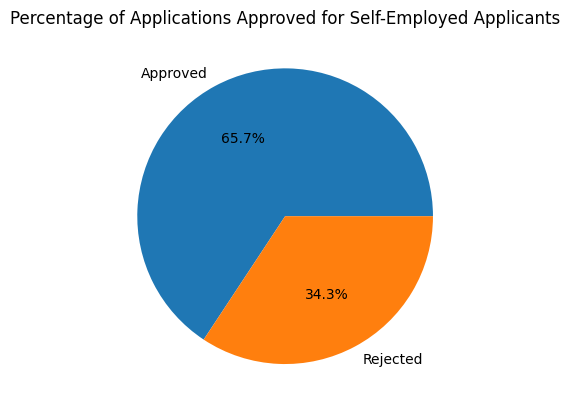

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 5.1


# Filter the DataFrame to only include self-employed applicants
self_employed_df = df[df['Self_Employed'] == 'Yes']

# Count the number of approved and rejected applications for self-employed applicants
approved_count = self_employed_df[self_employed_df['Application_Status'] == 'Y'].shape[0]
rejected_count = self_employed_df[self_employed_df['Application_Status'] == 'N'].shape[0]

# Calculate the percentage of approved applications for self-employed applicants
approved_percentage = approved_count / (approved_count + rejected_count) * 100

# Create a pie chart to display the approval percentage
labels = ['Approved', 'Rejected']
sizes = [approved_percentage, 100 - approved_percentage]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Applications Approved for Self-Employed Applicants')
plt.show()


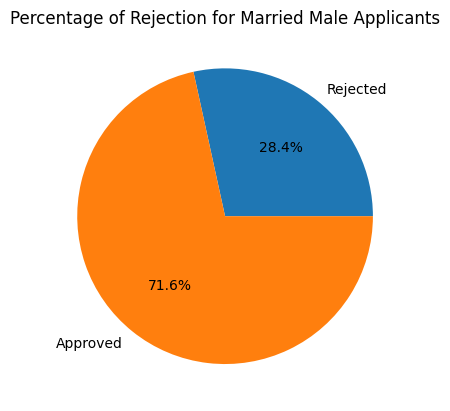

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# 5.2

# Filter the DataFrame to only include married male applicants
married_male_df = df[(df['Gender'] == 'Male') & (df['Married'] == 'Yes')]

# Count the number of approved and rejected applications for married male applicants
approved_count = married_male_df[married_male_df['Application_Status'] == 'Y'].shape[0]
rejected_count = married_male_df[married_male_df['Application_Status'] == 'N'].shape[0]

# Calculate the percentage of rejected applications for married male applicants
rejected_percentage = rejected_count / (approved_count + rejected_count) * 100

# Create a pie chart to display the rejection percentage
labels = ['Rejected', 'Approved']
sizes = [rejected_percentage, 100 - rejected_percentage]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Rejection for Married Male Applicants')
plt.show()


In [45]:
df.head(2)

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N


23/03/01 16:19:55 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 1805001 ms exceeds timeout 120000 ms
23/03/01 16:19:55 WARN SparkContext: Killing executors is not supported by current scheduler.
23/03/01 16:19:57 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 59826)
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.10/3.10.10/Frameworks/Python.framework/Versions/3.10/lib/python3.10/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/local/Cellar/python@3.10/3.10.10/Frameworks/Python.framework/Versions/3.10/lib/python3.10/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/usr/local/Cellar/python@3.10/3.10.10/Frameworks/Python.framework/Versions/3.10/lib/python3.10/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/local/Cellar/python@3.10/3.10.10/Frameworks/Python.framework/Versions/3.10/lib/python3.10/socketserver.py", line 747, in __init__
    self.handle()
  File "/usr/local/opt/apache-spark/libexec/python/pyspark/accumulators.p